# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers

## Epoch level learning curves

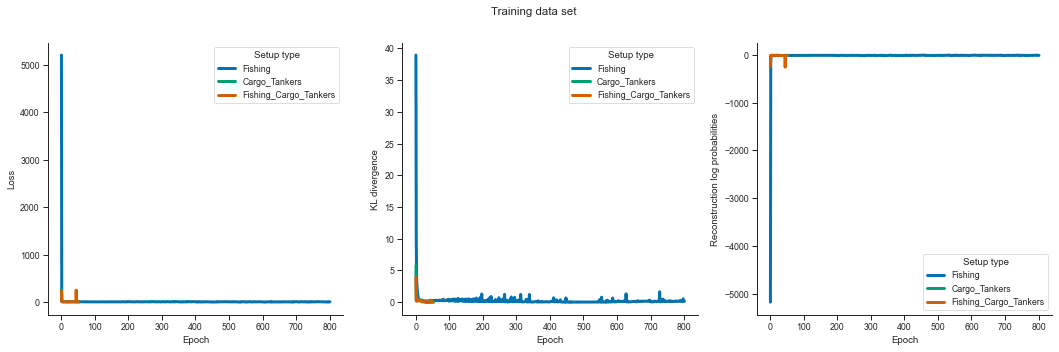

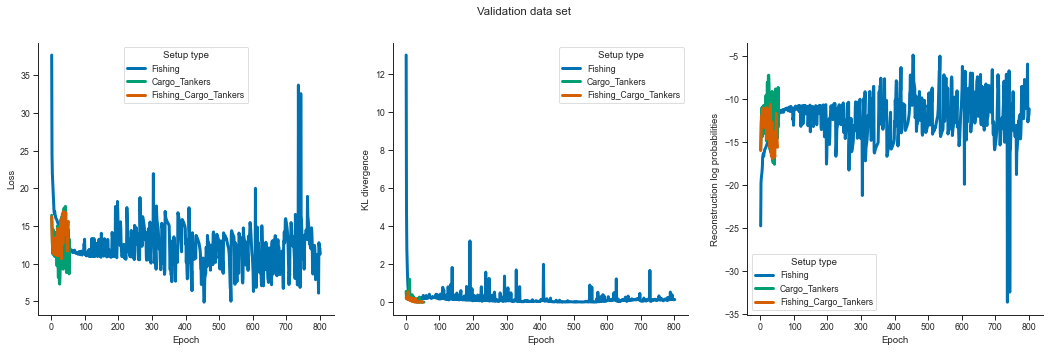

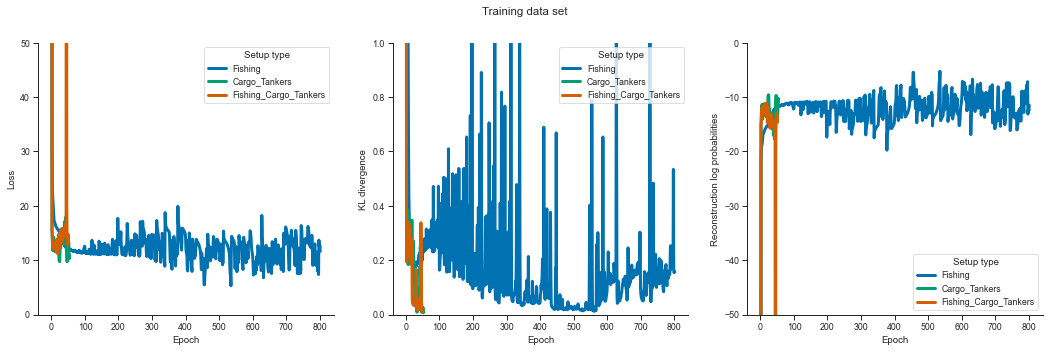

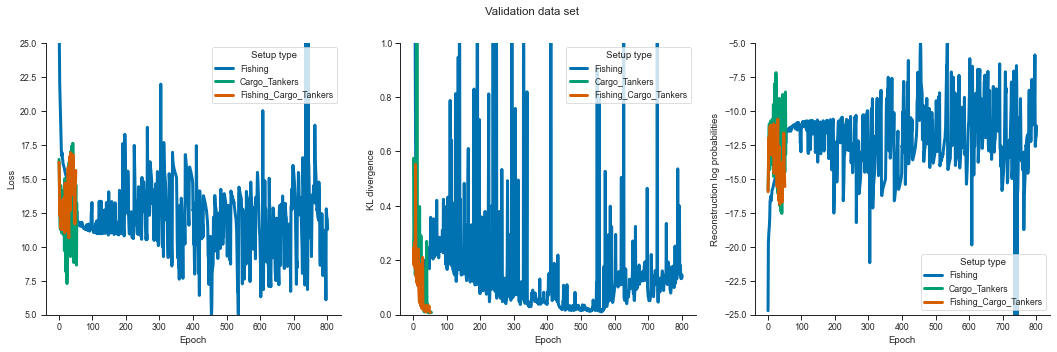

In [2]:
# Use the SummaryModels class
generative_dist = "Isotropic_Gaussian"
setup_type = "Fishing"
summary_models_fish = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", generative_dist=generative_dist)
df_default_fish = summary_models_fish.load_curves_df(setup_type)
# df_track_lvl_fish = summary_models_fish.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

# setup_type = "Fishing_I2.0"
# summary_models_fish_i20 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", inject_cargo_proportion= 2.0)
# df_fish_i20 = summary_models_fish_i20.load_curves_df(setup_type)
# df_track_lvl_fish_i20 = summary_models_fish_i20.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"]

setup_type = "Cargo_Tankers"
summary_models_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", generative_dist=generative_dist)
df_default_carg_tank = summary_models_carg_tank.load_curves_df(setup_type)
# df_track_lvl_carg_tank = data = summary_models_carg_tank.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

setup_type = "Fishing_Cargo_Tankers"
summary_models_fish_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600", generative_dist=generative_dist)
df_default_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type)
# df_track_lvl_fish_carg_tank = data = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
# df = pd.concat([df_default_fish, df_fish_i20, df_default_carg_tank, df_default_fish_carg_tank])
df = pd.concat([df_default_fish, df_default_carg_tank, df_default_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
# hue_order = ["Fishing",  "Fishing_I2.0", "Cargo_Tankers", "Fishing_Cargo_Tankers"]
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]

# Plot the learning curves
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                                          ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order,
                                          title="Validation data set", ylims=[(5, 25), (0, 1), (-25, -5)])

## Optimizer steps level learning curves

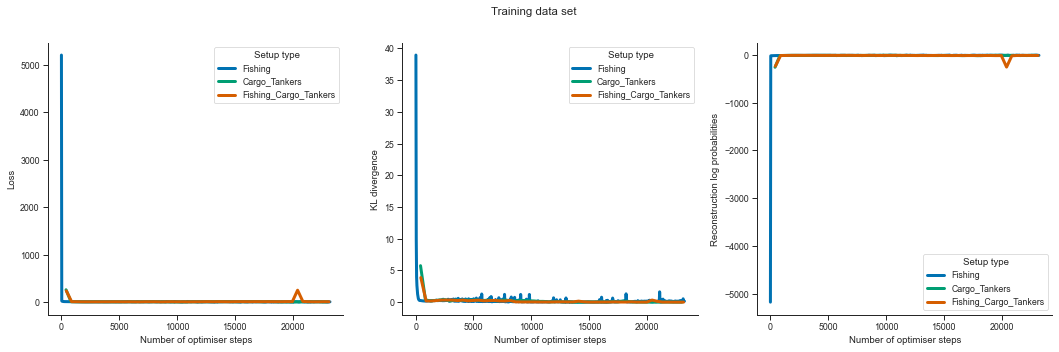

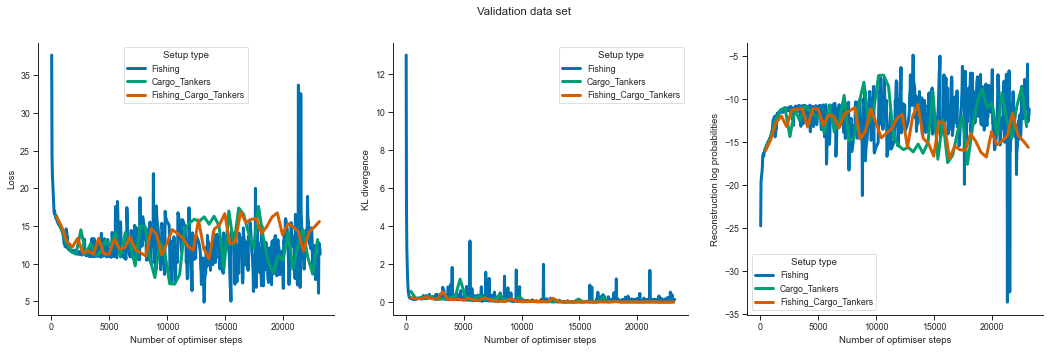

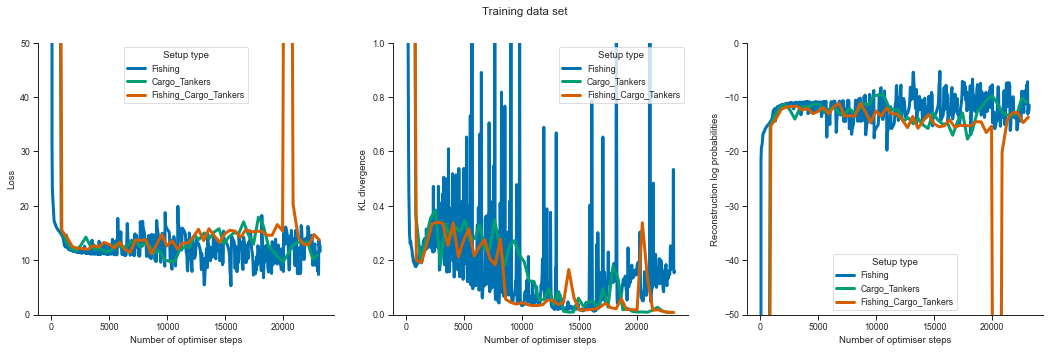

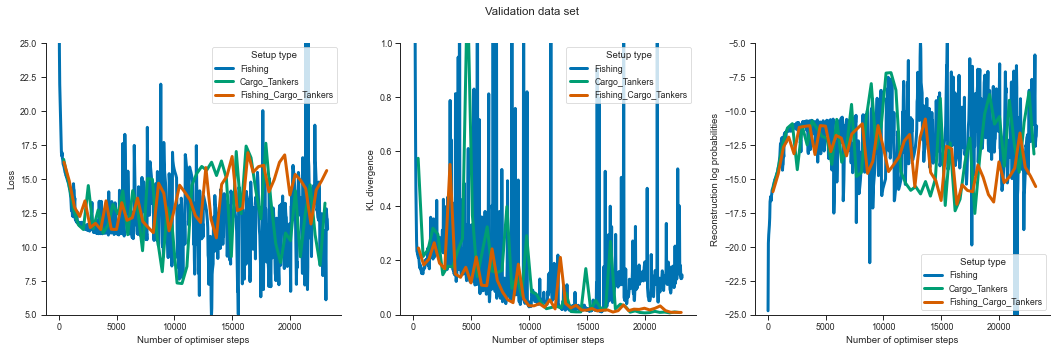

In [4]:
# Use the SummaryModels class
df_default_fish = summary_models_fish.load_curves_df("Fishing", level="Step")
#df_fish_i20 = summary_models_fish_i20.load_curves_df("Fishing_I2.0", level="Step")

df_default_carg_tank = summary_models_carg_tank.load_curves_df("Cargo_Tankers", level="Step")
df_default_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df("Fishing_Cargo_Tankers", level="Step")

# Combine the different vessel type date frames 
# df = pd.concat([df_default_fish,df_fish_i20, df_default_carg_tank, df_default_fish_carg_tank])
df = pd.concat([df_default_fish, df_default_carg_tank, df_default_fish_carg_tank])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
x="Number of optimiser steps"
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, x=x, title="Training data set")
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, x=x, title="Validation data set")

# Zoom in
ylims = [(4, 30), (0, 0.1), (-30, -4)]
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, x=x, title="Training data set",
                                          ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, x=x,
                                          title="Validation data set", ylims=[(5, 25), (0, 1), (-25, -5)])